In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'../..'))

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from heatmapcluster import heatmapcluster

In [4]:
from services import DataReader

X, y = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

_, y = DataReader().read_data('BC', by_stage=True)

In [5]:
import pandas as pd
from functional import seq
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import VarianceThreshold
from preprocessing import DynamicPreprocessing, InverseDictVectorizer

pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])

X_t = pre.fit_transform(X, y)
X_t, y_t = zip(*seq(X_t).zip(y).filter(lambda x: x[1] != 'h').to_list())

vect = DictVectorizer(sparse=False)
pipe = Pipeline([
    ('vect', vect),
    ('vt', VarianceThreshold(threshold=0.5)),
    ('inv-vect', InverseDictVectorizer(vect)),
])

X_t = pipe.fit_transform(X_t, y)

df = pd.DataFrame().from_records(X_t).T
df.columns = y_t

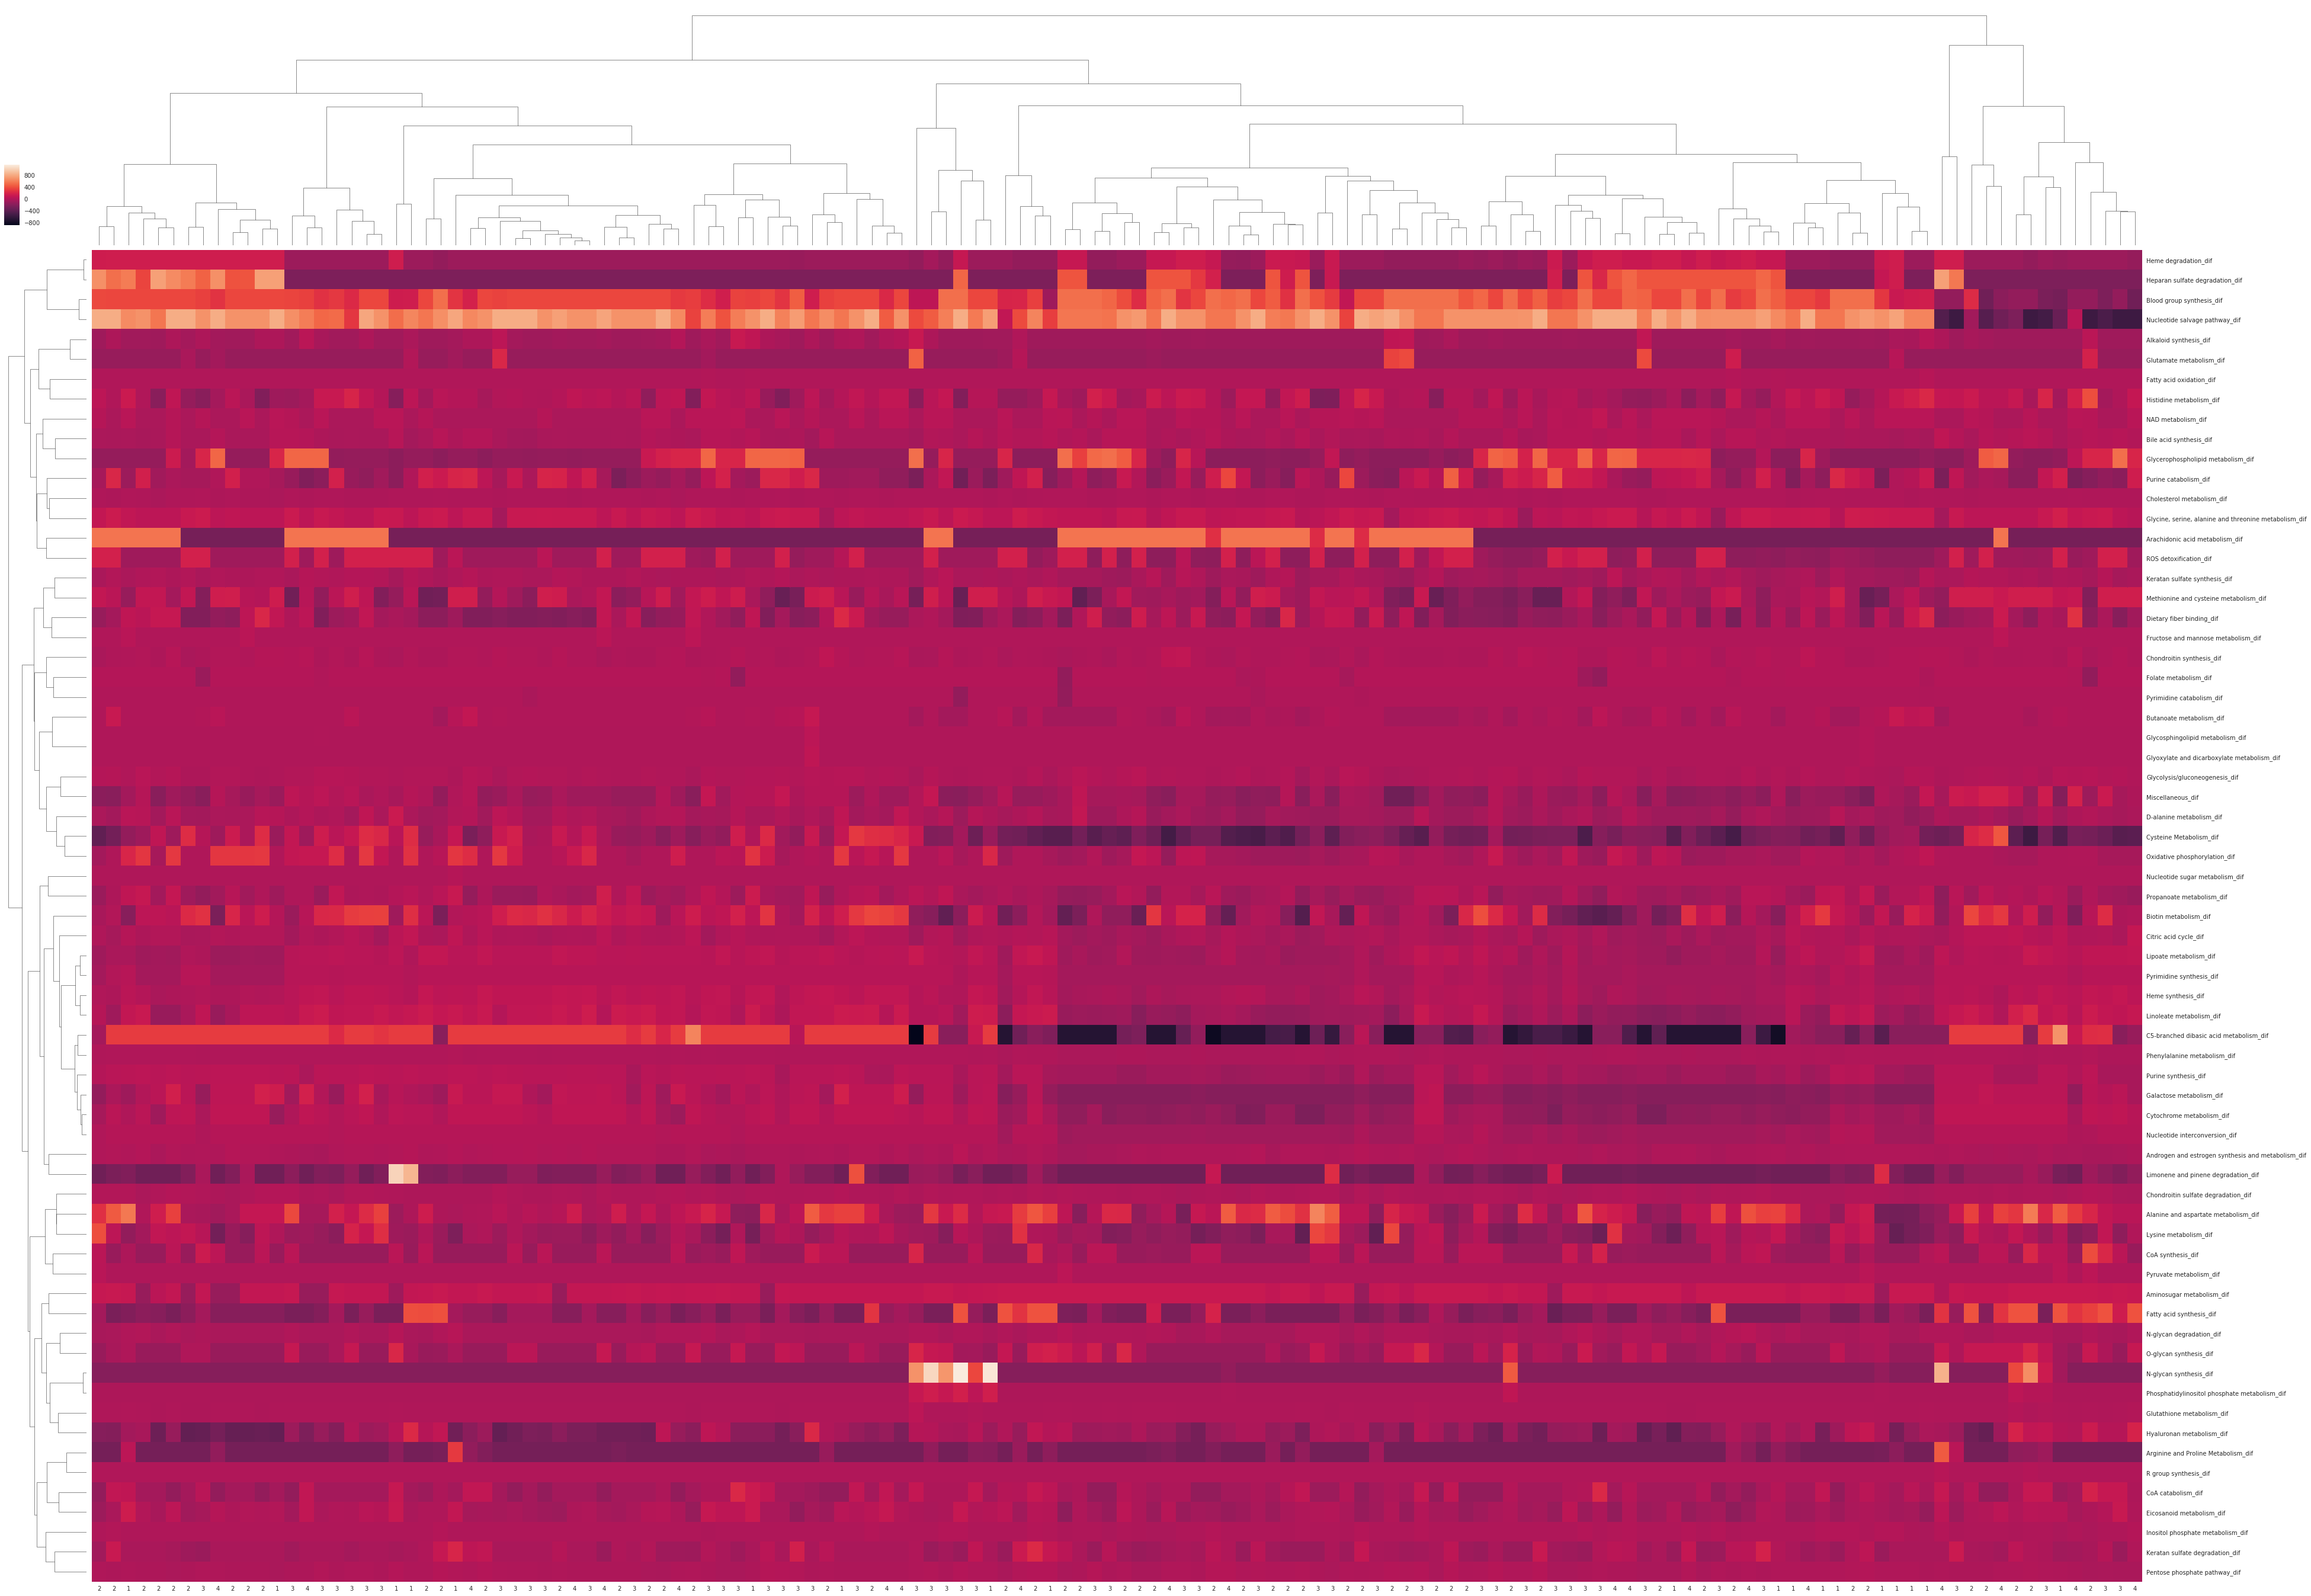

In [6]:
%matplotlib inline

import seaborn as sns
from scipy.cluster.hierarchy import linkage

sns.set(color_codes=True)

g = sns.clustermap(df, figsize=(44, 44), metric='correlation', method='complete')


cm = g
hm = cm.ax_heatmap.get_position()
# plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=20)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width * 1.5, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width * 1.5, col.height*3])

In [23]:
import pandas as pd
from functional import seq
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import VarianceThreshold
from preprocessing import DynamicPreprocessing, InverseDictVectorizer

pre = DynamicPreprocessing(['flux-diff'])

X_reaction = pre.fit_transform(X, y)
X_reaction, y_t = zip(*seq(X_t).zip(y).filter(lambda x: x[1] != 'h').to_list())

vect = DictVectorizer(sparse=False)
pipe = Pipeline([
    ('vect', vect),
    ('vt', VarianceThreshold()),
    ('inv-vect', InverseDictVectorizer(vect)),
])

X_t = pipe.fit_transform(X_reaction, y)

df_reaction = pd.DataFrame().from_records(X_reaction).T
df_reaction.columns = y_t

In [32]:
%matplotlib inline

import seaborn as sns
from scipy.cluster.hierarchy import linkage

sns.set(color_codes=True)

g = sns.clustermap(df_reaction.fillna(0), figsize=(60, 240), metric='euclidean', method='complete')

cm = g
hm = cm.ax_heatmap.get_position()
# plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=20)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width * 1.5, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width * 1.5, col.height*3])